# Desafio de inferência

In [22]:
#Importando bibliotecas

#Análise de Dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Stats libs
from scipy.stats import f_oneway

## Importando e tratando os dados

In [98]:
#Importando os dados
PAG = pd.read_csv('PAG_HEI.csv')
DEMO = pd.read_csv('DEMO_PHQ.csv')
print(PAG.head())
print(DEMO.head())

    SEQN     PAG_MINW  ADHERENCE  HEI2015C1_TOTALVEG  \
0  31128          NaN        NaN            3.083350   
1  31129   285.450346        2.0            1.697761   
2  31130     0.000000        1.0                 NaN   
3  31131   264.711316        2.0            3.115103   
4  31132  1353.348730        3.0            3.509081   

   HEI2015C2_GREEN_AND_BEAN  HEI2015C3_TOTALFRUIT  HEI2015C4_WHOLEFRUIT  \
0                       0.0              3.927008              5.000000   
1                       0.0              3.731602              4.929186   
2                       NaN                   NaN                   NaN   
3                       0.0              5.000000              1.320674   
4                       0.0              5.000000              5.000000   

   HEI2015C5_WHOLEGRAIN  HEI2015C6_TOTALDAIRY  HEI2015C7_TOTPROT  \
0              0.000000              5.000000           4.251329   
1              0.527631              3.887809           4.693141   
2       

In [99]:
print(DEMO.shape)
print(PAG.shape)

(5334, 15)
(9424, 17)


In [100]:
df = DEMO.merge(PAG, on = 'SEQN', how = 'left')
print(df.shape)

(5334, 31)


In [101]:
#Dividindo em target e variáveis expliactivas
target_variables = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080','DPQ090']
features = list(df.filter(regex='HEI').columns) + ['ADHERENCE']
print(features)

['HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE', 'ADHERENCE']


## Análise Exploratória

Alimentação saudável parece estar associada a saúde mental. Por outro lado, deprimidos parecem consumir menos açúcar!

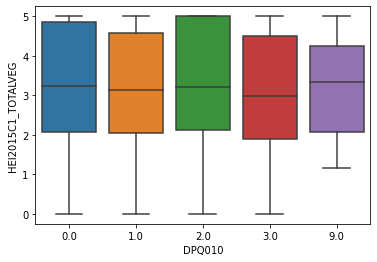

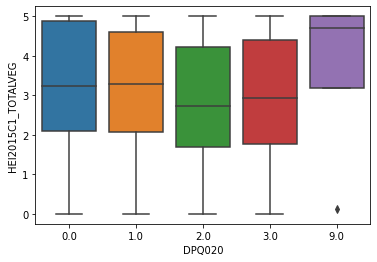

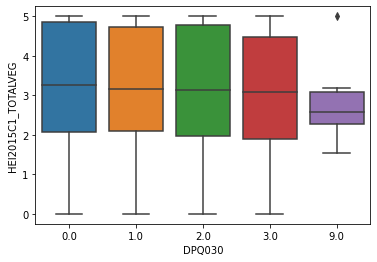

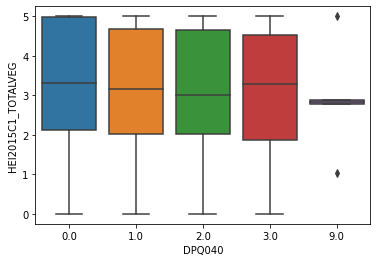

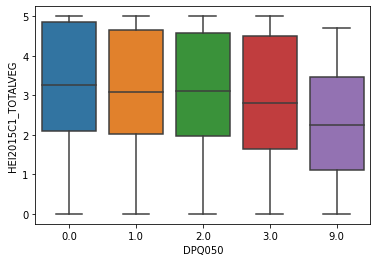

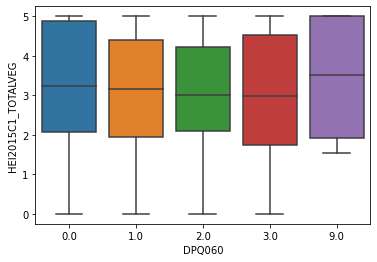

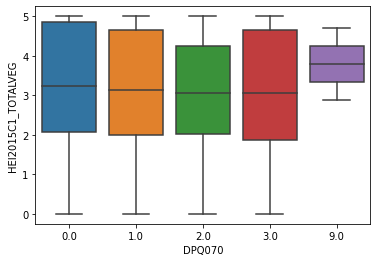

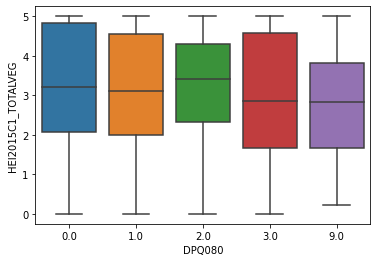

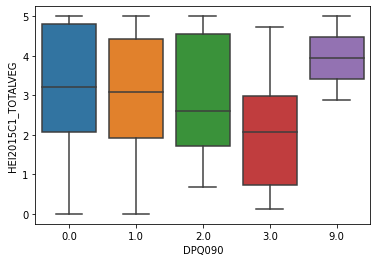

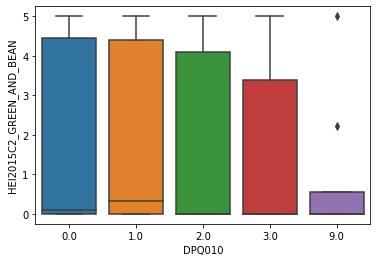

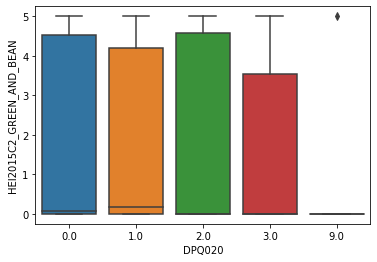

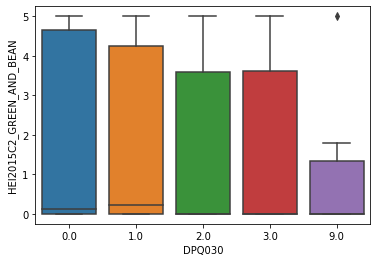

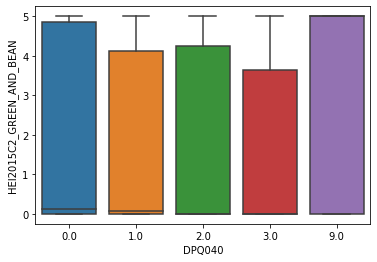

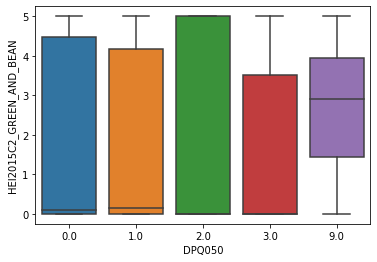

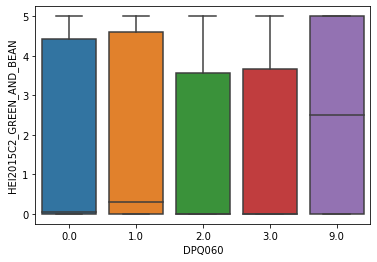

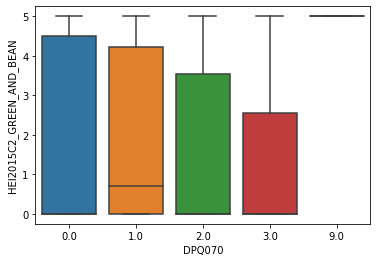

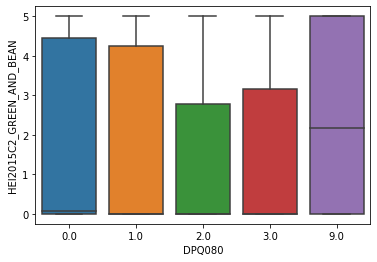

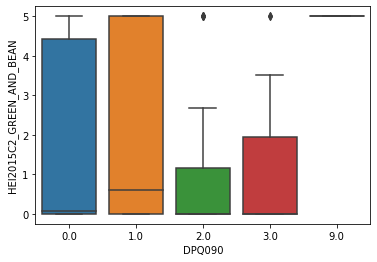

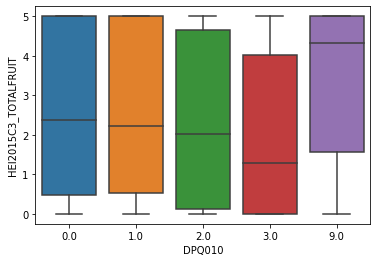

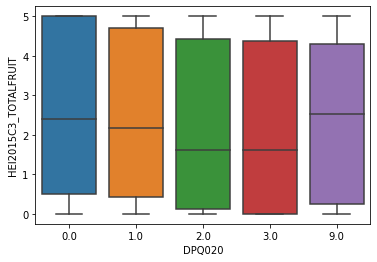

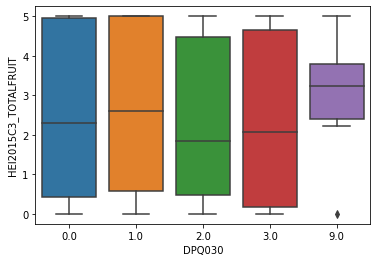

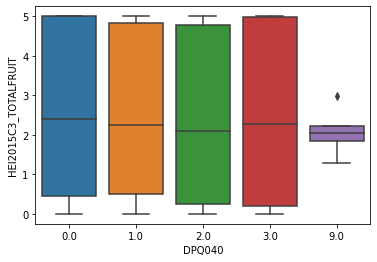

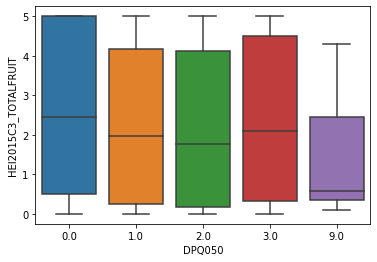

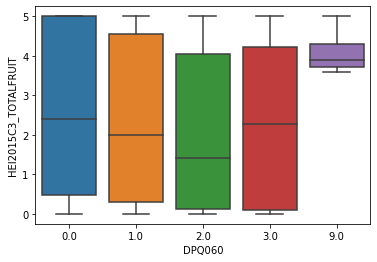

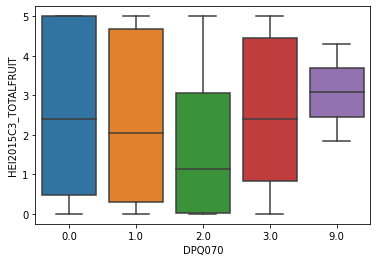

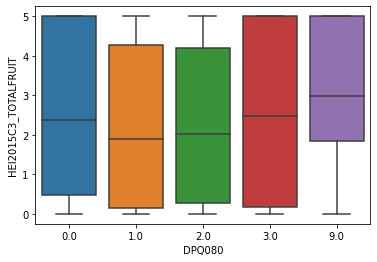

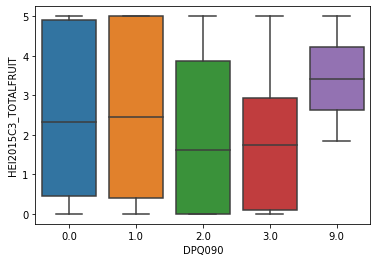

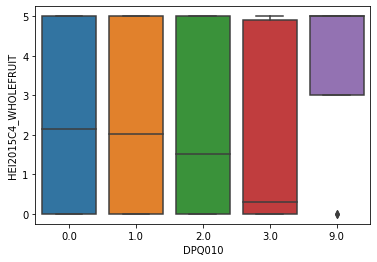

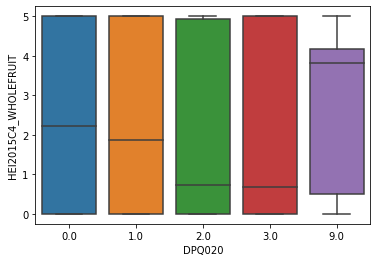

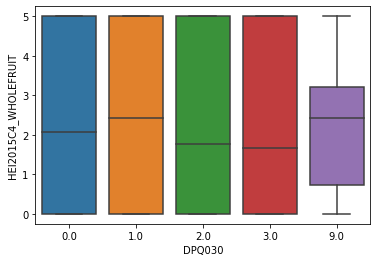

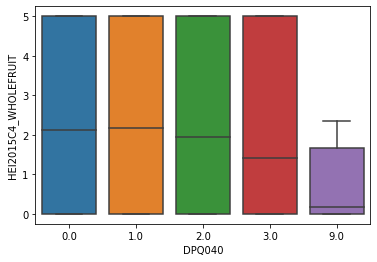

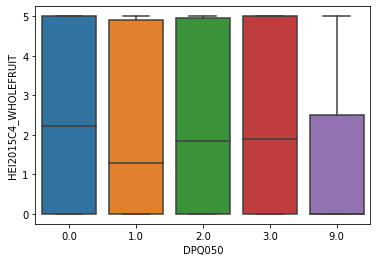

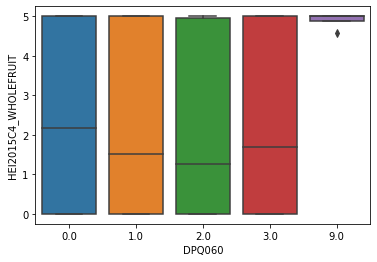

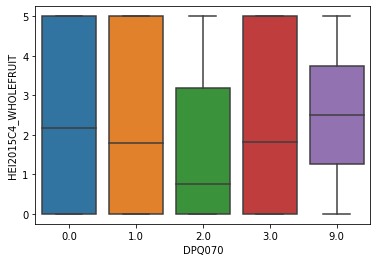

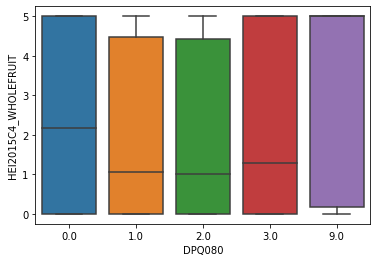

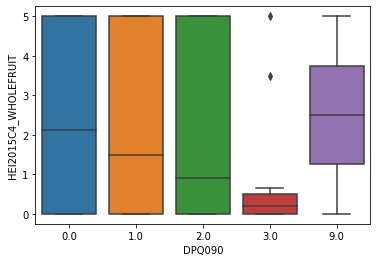

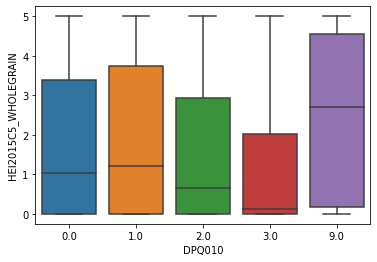

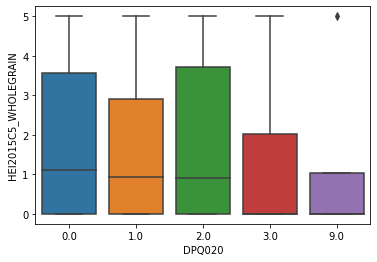

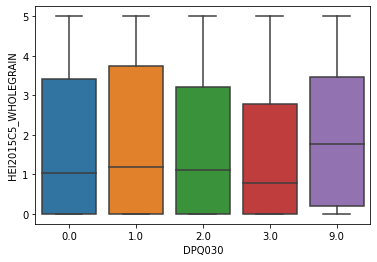

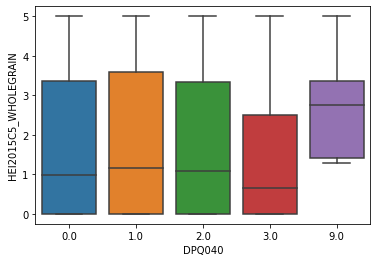

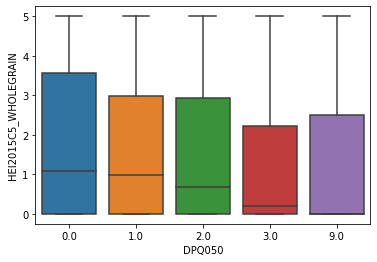

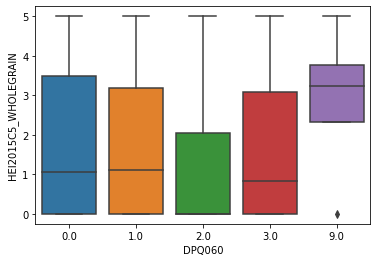

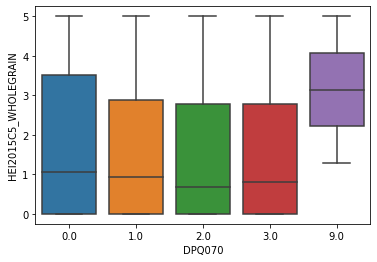

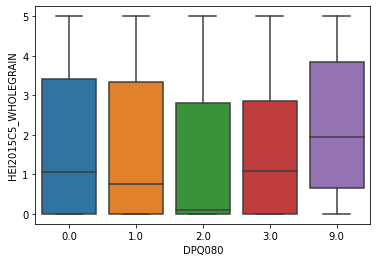

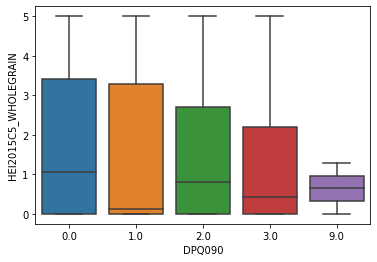

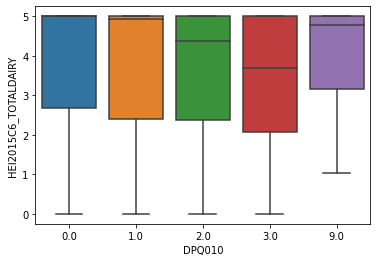

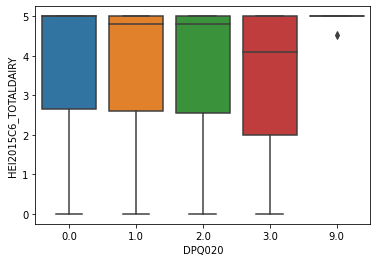

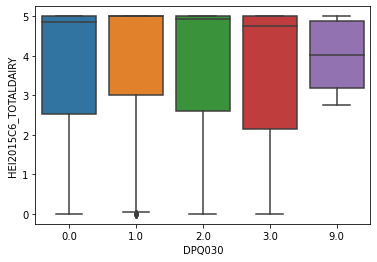

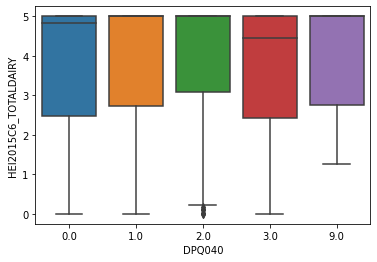

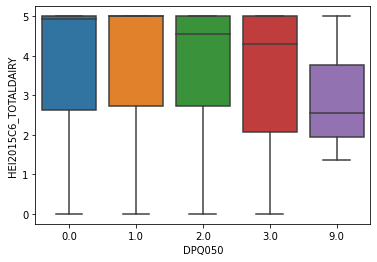

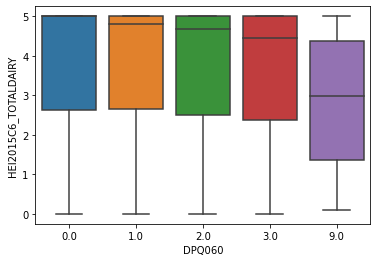

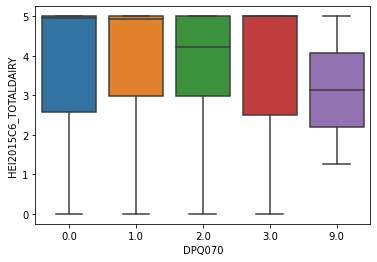

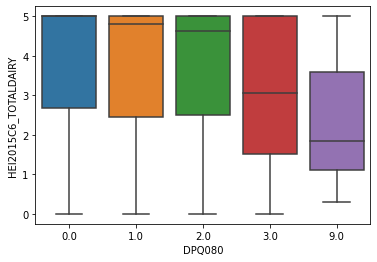

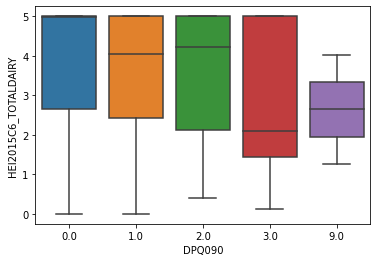

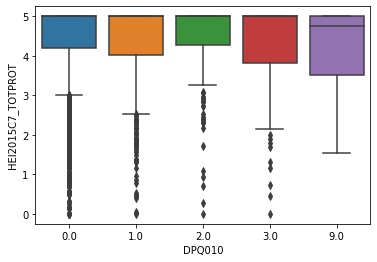

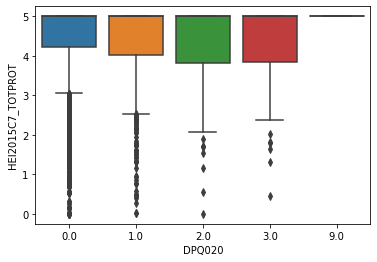

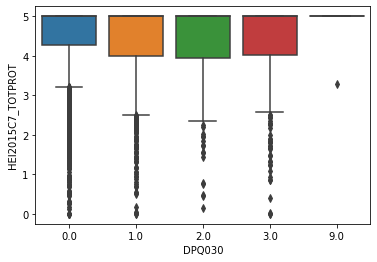

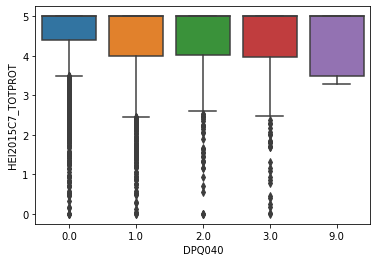

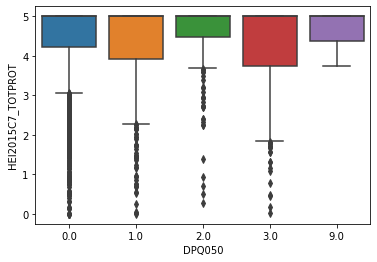

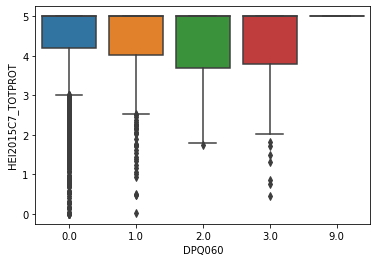

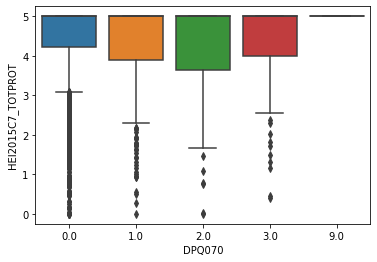

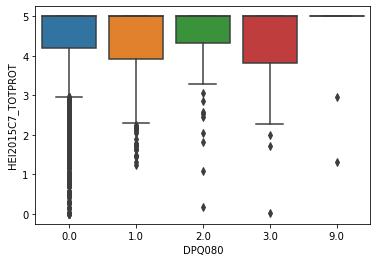

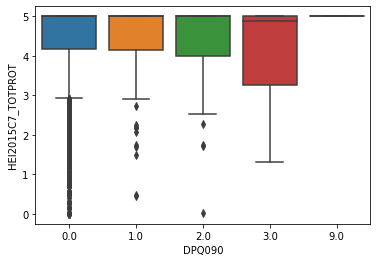

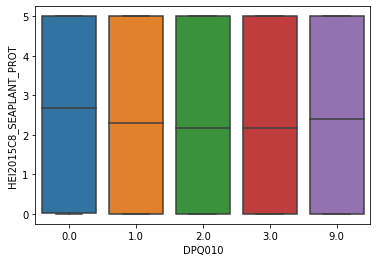

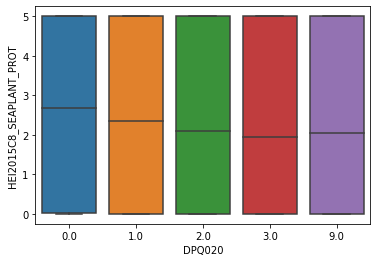

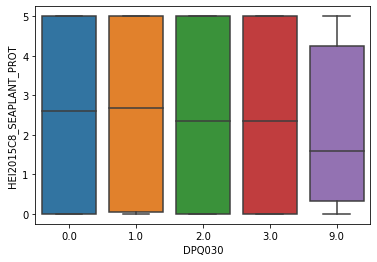

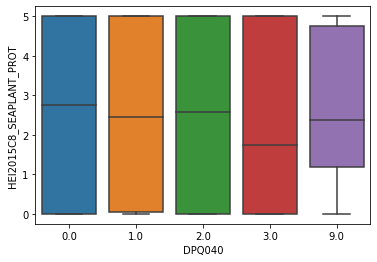

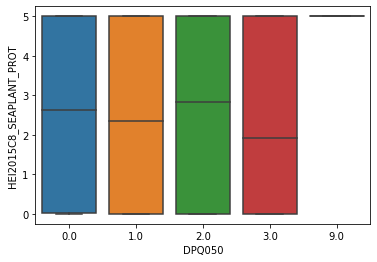

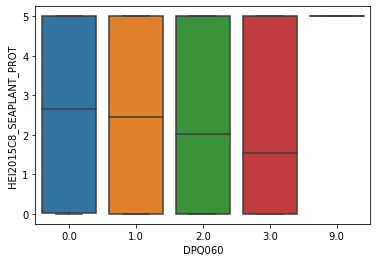

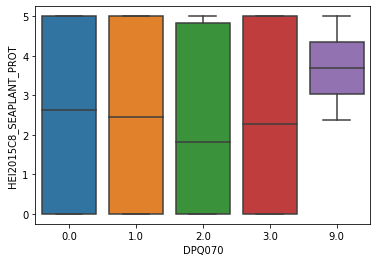

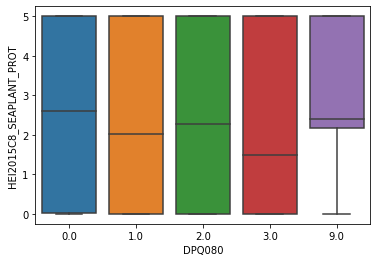

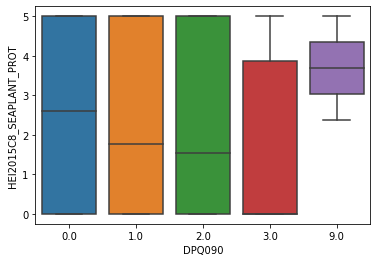

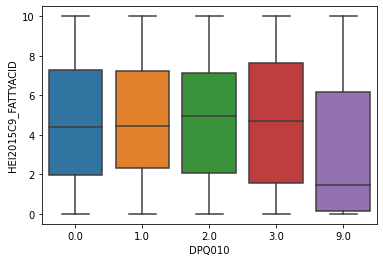

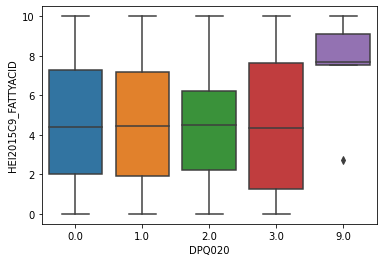

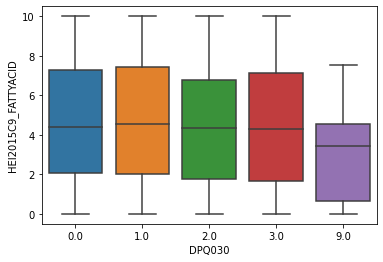

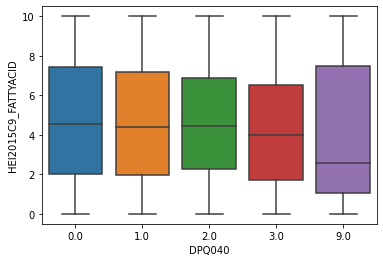

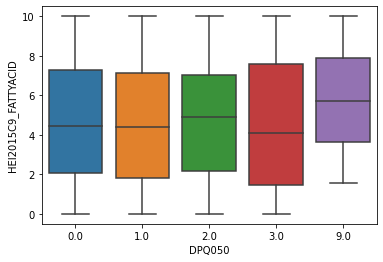

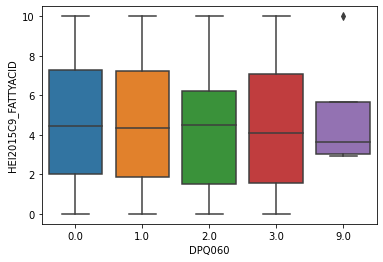

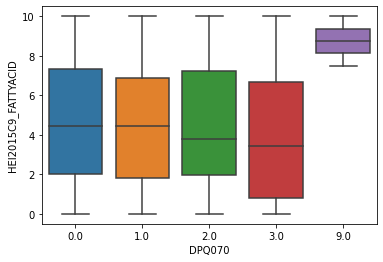

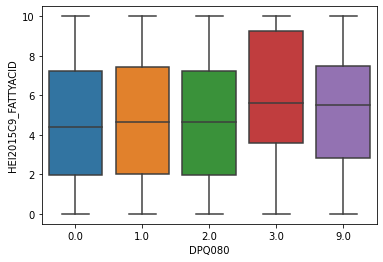

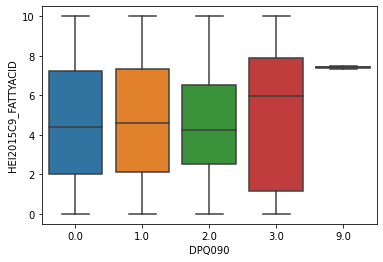

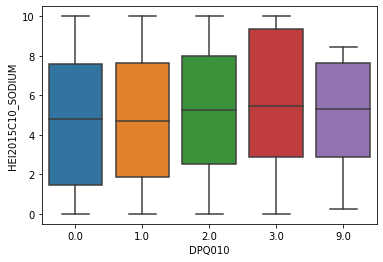

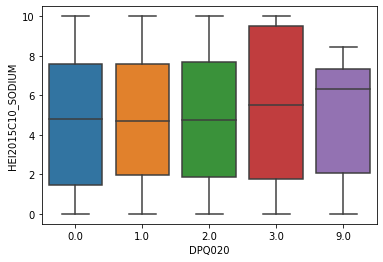

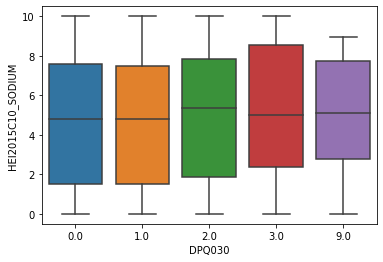

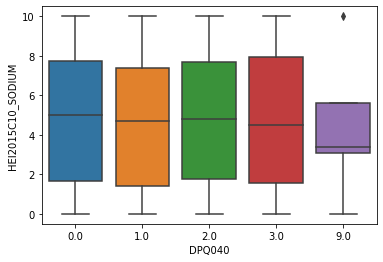

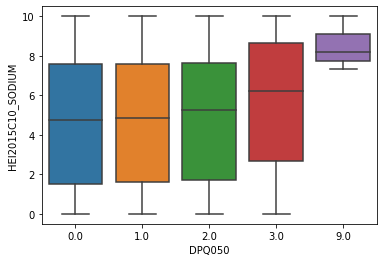

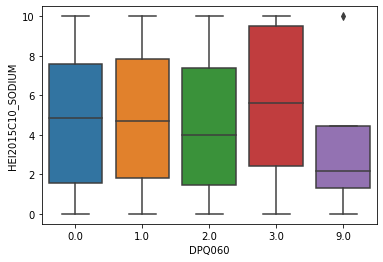

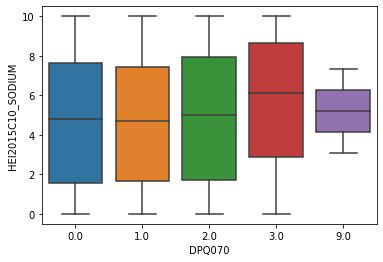

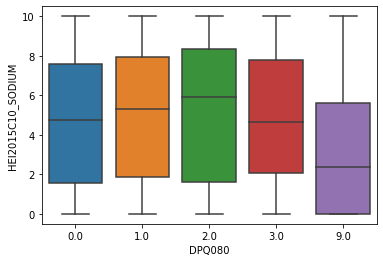

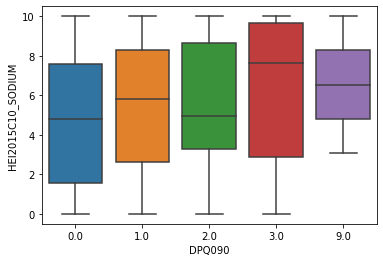

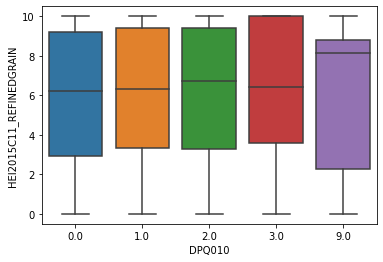

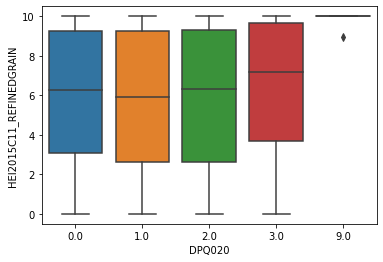

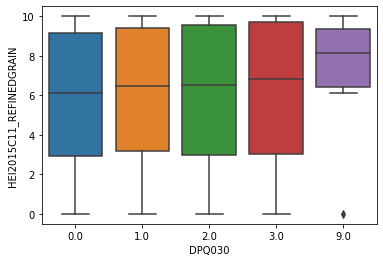

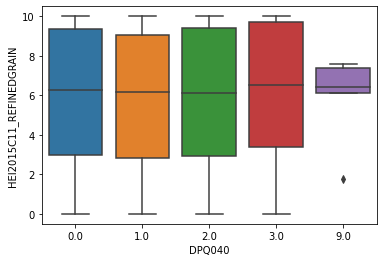

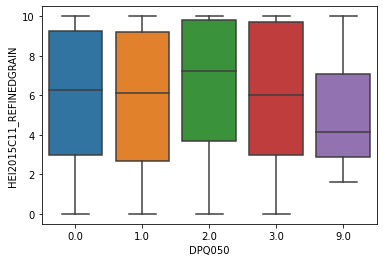

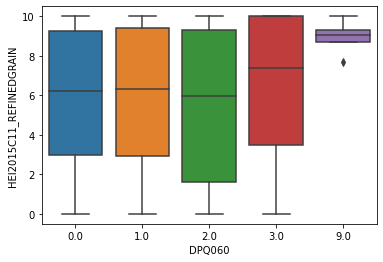

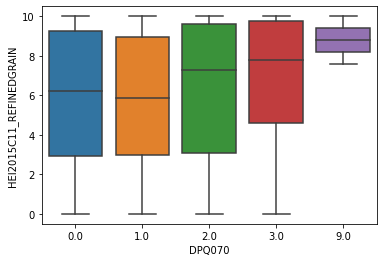

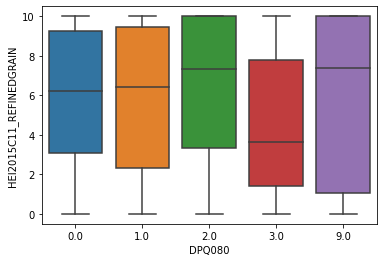

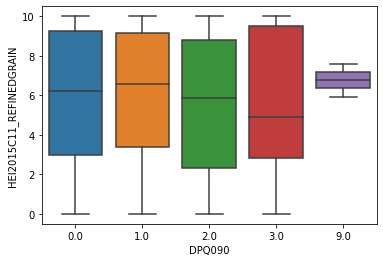

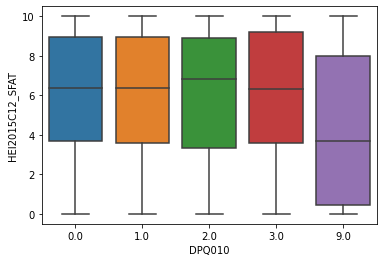

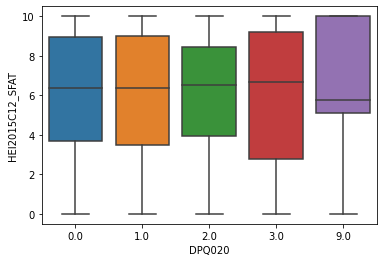

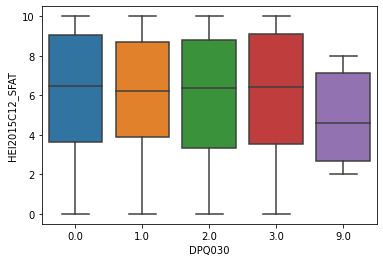

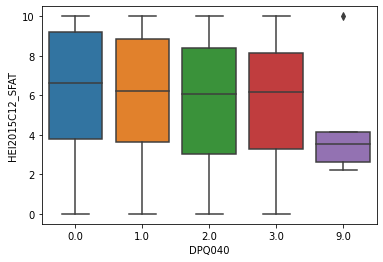

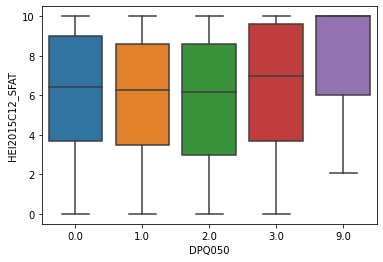

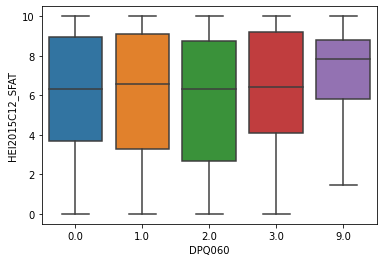

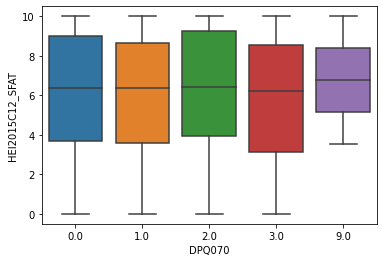

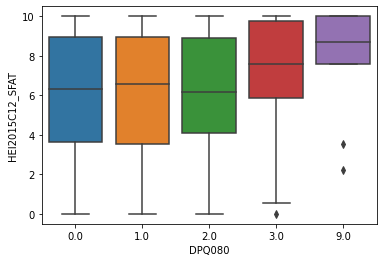

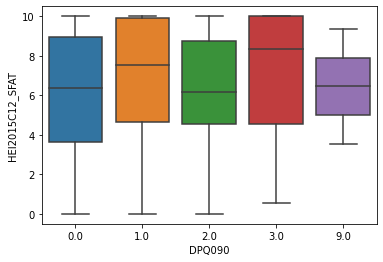

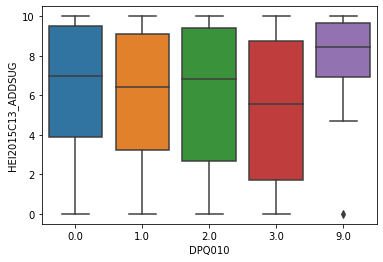

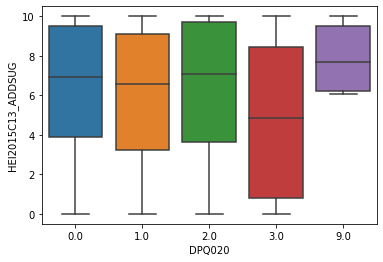

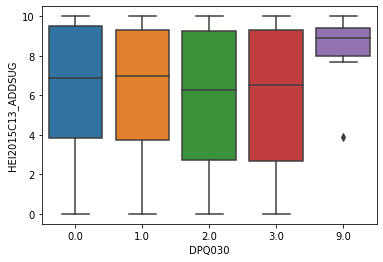

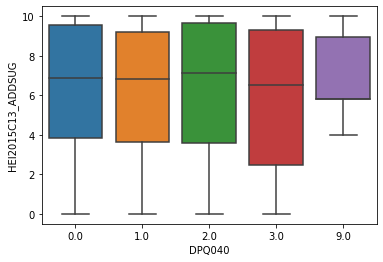

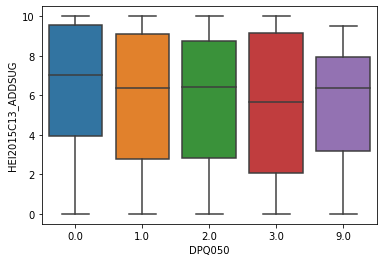

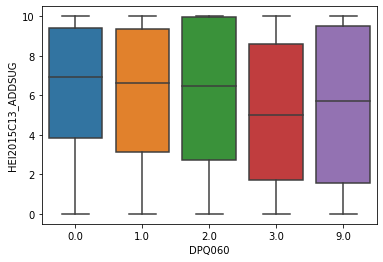

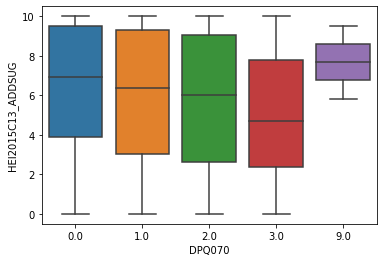

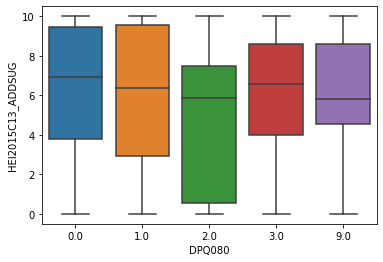

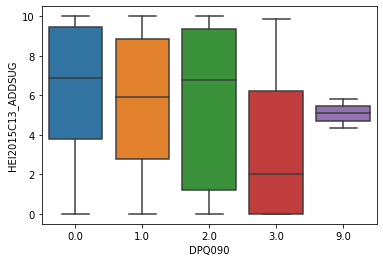

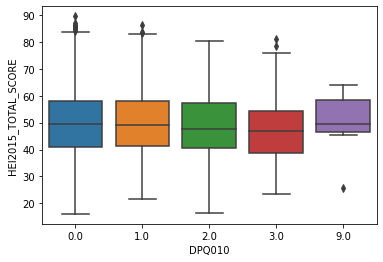

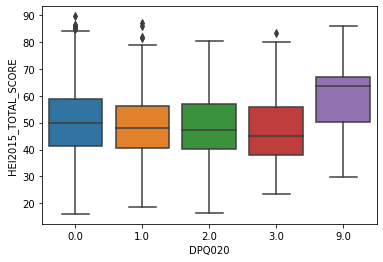

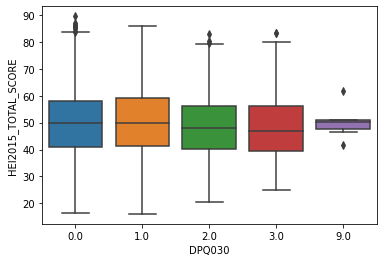

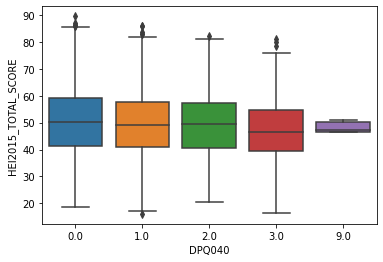

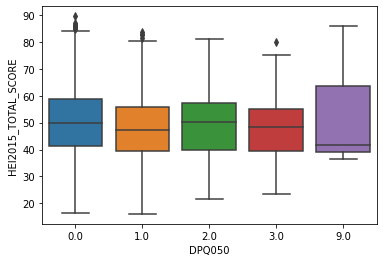

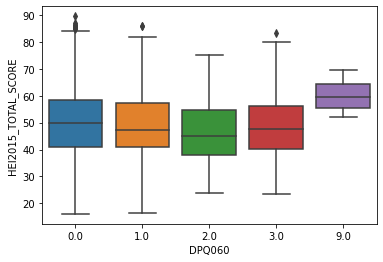

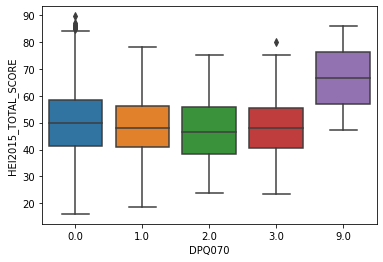

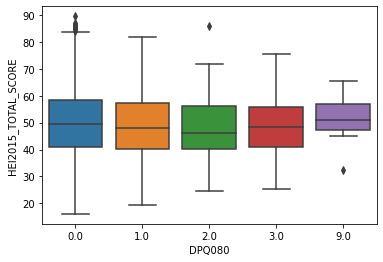

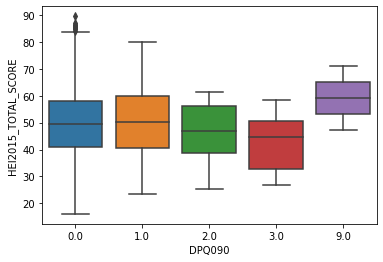

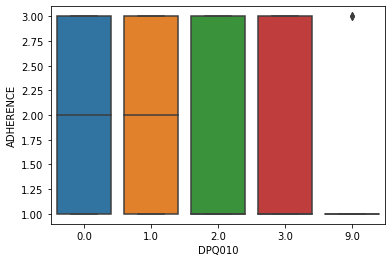

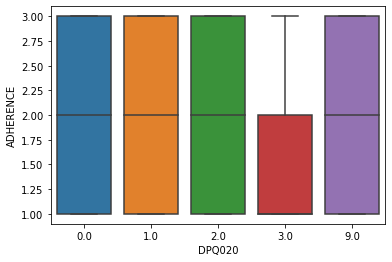

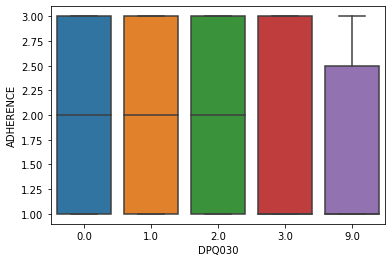

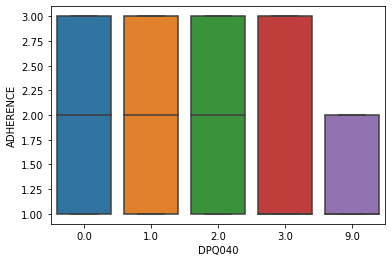

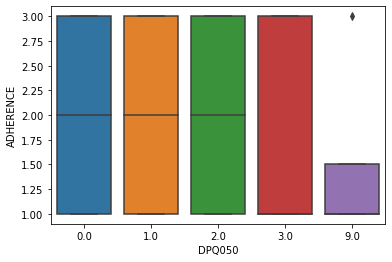

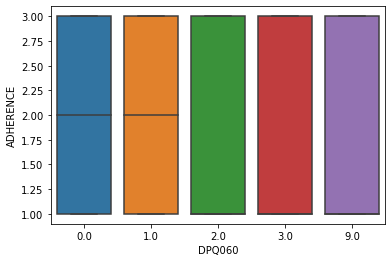

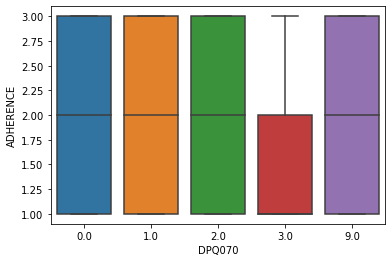

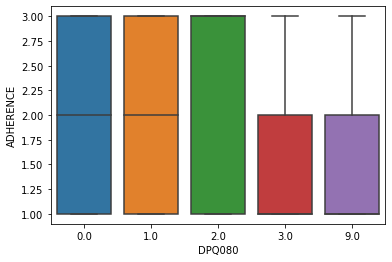

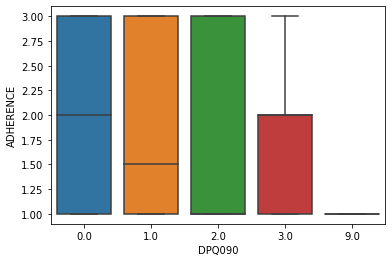

In [20]:
for i in features:
    for j in target_variables:
        sns.boxplot(data = df, x = j, y = i)
        plt.show()

## Teste de hipótese

Vamos fazer o teste de hipótese de diferença de média das features para cada nível das categorias das variáveis alvo

In [121]:
#Faz o teste de hipótese entre todos os níveis de uma feature e de um target
def teste_hipotese(feature, target):
    base = {}
    levels = [0,1,2,3,9]
    for i in levels:
        name = feature + "_" + target + "_" + str(i)
        base[name] = list(df.loc[df[target] == i, feature])
        base_df = pd.DataFrame.from_dict(base, orient='index').transpose()
    data = [base_df[col].dropna() for col in base_df]
    stat, p = f_oneway(*data)
    return stat,p

In [123]:
#Construindo um dicionario com todas as relações
dicionario = {}
for i in features:
    for j in target_variables:
        name = i+"_"+j
        dicionario[name] = teste_hipotese(i,j)
dicionario

{'HEI2015C1_TOTALVEG_DPQ010': (1.115175064797024, 0.34737184608972077),
 'HEI2015C1_TOTALVEG_DPQ020': (3.952899375150505, 0.0033163917192119458),
 'HEI2015C1_TOTALVEG_DPQ030': (1.151052249176901, 0.3305150211823084),
 'HEI2015C1_TOTALVEG_DPQ040': (1.9718148500402986, 0.09598386009480586),
 'HEI2015C1_TOTALVEG_DPQ050': (3.63366022931137, 0.005819347213638287),
 'HEI2015C1_TOTALVEG_DPQ060': (1.5915276386190151, 0.1736181345621479),
 'HEI2015C1_TOTALVEG_DPQ070': (0.7918461237193148, 0.5302784284235027),
 'HEI2015C1_TOTALVEG_DPQ080': (0.8379004317641384, 0.5008731934716492),
 'HEI2015C1_TOTALVEG_DPQ090': (2.669082774485823, 0.030578412885365863),
 'HEI2015C2_GREEN_AND_BEAN_DPQ010': (1.4771891261730632, 0.2062545805153439),
 'HEI2015C2_GREEN_AND_BEAN_DPQ020': (0.813493387591797, 0.5163265628960214),
 'HEI2015C2_GREEN_AND_BEAN_DPQ030': (1.45671159255377, 0.2126443072917917),
 'HEI2015C2_GREEN_AND_BEAN_DPQ040': (1.5526810984120893, 0.18414641517004998),
 'HEI2015C2_GREEN_AND_BEAN_DPQ050': (0.

Ao todo, são 135 relações

In [126]:
#Transformando em df
df_anova = pd.DataFrame.from_dict(dicionario).transpose()
df_anova.columns = ['statistic', 'pvalue']
df_anova

,statistic,pvalue
HEI2015C1_TOTALVEG_DPQ010,1.115175,0.347372
HEI2015C1_TOTALVEG_DPQ020,3.952899,0.003316
HEI2015C1_TOTALVEG_DPQ030,1.151052,0.330515
HEI2015C1_TOTALVEG_DPQ040,1.971815,0.095984
HEI2015C1_TOTALVEG_DPQ050,3.633660,0.005819
...,...,...
ADHERENCE_DPQ050,7.146670,0.000010
ADHERENCE_DPQ060,4.187627,0.002186
ADHERENCE_DPQ070,6.099611,0.000068
ADHERENCE_DPQ080,3.633901,0.005816


Filtrando as relações estatisticamente significantes

In [128]:
df_significante = df_anova.loc[df_anova['pvalue'] < 0.05]
print(df_significante)
print(df_significante.shape)

                                 statistic        pvalue
HEI2015C1_TOTALVEG_DPQ020         3.952899  3.316392e-03
HEI2015C1_TOTALVEG_DPQ050         3.633660  5.819347e-03
HEI2015C1_TOTALVEG_DPQ090         2.669083  3.057841e-02
HEI2015C2_GREEN_AND_BEAN_DPQ070   2.845748  2.268919e-02
HEI2015C2_GREEN_AND_BEAN_DPQ090   2.517004  3.943816e-02
HEI2015C3_TOTALFRUIT_DPQ010       2.698409  2.910649e-02
HEI2015C3_TOTALFRUIT_DPQ020       2.955222  1.883247e-02
HEI2015C3_TOTALFRUIT_DPQ050       5.550267  1.867726e-04
HEI2015C3_TOTALFRUIT_DPQ060       3.551214  6.722788e-03
HEI2015C3_TOTALFRUIT_DPQ070       5.282523  3.042657e-04
HEI2015C4_WHOLEFRUIT_DPQ010       2.454700  4.374003e-02
HEI2015C4_WHOLEFRUIT_DPQ020       3.397822  8.783869e-03
HEI2015C4_WHOLEFRUIT_DPQ050       3.625533  5.902831e-03
HEI2015C4_WHOLEFRUIT_DPQ060       2.773074  2.566149e-02
HEI2015C4_WHOLEFRUIT_DPQ070       4.436151  1.402726e-03
HEI2015C4_WHOLEFRUIT_DPQ080       3.486508  7.526908e-03
HEI2015C5_WHOLEGRAIN_DPQ010    

In [131]:
print("Apenas", round((57/135)*100,2), "% das relações são estatisticamente significantes")

Apenas 42.22 % das relações são estatisticamente significantes
